<a href="https://colab.research.google.com/github/penny1xu/RESTS/blob/main/compare_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install censusgeocode
!pip install rets
import csv
import censusgeocode as cg
import numpy as np
from rets import Session
import datetime
import time
from datetime import datetime,timedelta
!pip install pytz
import matplotlib.pyplot as plt
import pytz


In [4]:
login_url = 'https://ntrdd.mlsmatrix.com/rets/Login.ashx' 
username = '0671181_NID'
password = 'Rt$tg6jx'
rets_client = Session(login_url, username, password)
rets_client.login()


True

In [172]:
import time
from datetime import datetime, timedelta
tz_IN = pytz.timezone('US/Central')
today = datetime.now(tz_IN)
today_before_1year = today - timedelta(days=365)
dt_string = today_before_1year.strftime("%Y-%m-%d")

dt_string


'2021-06-16'

In [144]:
import datetime
data = '2021-07-13'
date = date.split("-")
d = datetime.date(int(date[0]),int(date[1]),int(date[2])).isocalendar()[1]
print(d)


28


In [179]:
# pull all the data which is satisfy the condition
import pandas as pd
import datetime

new_list = rets_client.search(resource = 'Property', resource_class='Property',limit = 100, dmql_query='(ListingContractDate = 2022-01-01+)')
lis = []
di ={}
df = pd.DataFrame()
for item in new_list:
  if(item['PropertyType'] == 'Residential' and item['PropertySubType'] == 'Single Family Residence'):
    df = pd.concat([df, pd.DataFrame(item.values())], axis=1, ignore_index=True) 
    di = item 
for key in di:
  lis.append(key)
df = df.T
df.columns = lis
new = len(df.index)

# get each date and sign to different week
df['ListingContractDate'] = pd.to_datetime(df['ListingContractDate'], errors='coerce')
df['week_number_of_year'] = df['ListingContractDate'].dt.week
# pull together different weeks' data
df['week_number_of_year'].value_counts()
print(df['week_number_of_year'].value_counts())

#df.to_csv('data.csv')


1     20
2     10
4      8
3      6
8      5
6      5
5      4
7      3
9      3
13     2
52     2
10     1
11     1
12     1
17     1
19     1
14     1
Name: week_number_of_year, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


In [ ]:
cls_list = rets_client.search(resource = 'Property', resource_class='Property',dmql_query='(CloseDate = 2022-01-01+)')
lis = []
di ={}
df = pd.DataFrame()
for item in cls_list:
  if(item['PropertyType'] == 'Residential' and item['PropertySubType'] == 'Single Family Residence'):
    df = pd.concat([df, pd.DataFrame(item.values())], axis=1, ignore_index=True) 
    di = item 
for key in di:
  lis.append(key)
df = df.T
df.columns = lis
close = len(df.index)

# get each date and sign to different week
df['CloseDate'] = pd.to_datetime(df['CloseDate'], errors='coerce')
df['week_number_of_year'] = df['CloseDate'].dt.week
# pull together different weeks' data
df['week_number_of_year'].value_counts()
print(df['week_number_of_year'].value_counts())

#df.to_csv('data.csv')



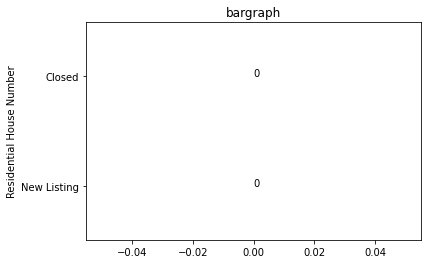

In [121]:
import matplotlib.pyplot as plt

xAxis = ['New Listing','Closed']
yAxis = [new,close]
New_Colors = ['green','blue']

plt.barh(xAxis,yAxis,color=New_Colors)
plt.title('bargraph')
plt.ylabel('Residential House Number')

for index, value in enumerate(yAxis):
    plt.text(value, index,str(value))

plt.show()
